In [0]:
import keras
from keras import models
from keras import layers
from keras.datasets import mnist
from keras.layers import merge
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

(train_images_original, train_labels_original), (test_images_original, test_labels_original) = mnist.load_data()

In [0]:
train_images = train_images_original.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images_original.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels_original)
test_labels = to_categorical(test_labels_original)

In [172]:
train_images.shape

(60000, 784)

In [173]:
train_images_original.shape

(60000, 28, 28)

In [189]:
vec = np.zeros([60000, 1])
vec.shape

(60000, 1)

In [0]:
i = 0
for images in train_images:
  # Handcrafted features
  f1 = train_images[i].mean()
  # Throw the handcrafted features into a vector and concat it with the flattened image vector
  vec[i] = np.array([f1])
  #train_images[i] = np.concatenate((train_images[i], vec))
  i=i+1

In [191]:
vec2 = np.zeros([10000, 1])
vec2.shape

(10000, 1)

In [0]:
i = 0
for images in test_images:
  # Handcrafted features
  f1 = test_images[i].mean()
  # Throw the handcrafted features into a vector and concat it with the flattened image vector
  vec2[i] = np.array([f1])
  #train_images[i] = np.concatenate((train_images[i], vec))
  i=i+1

In [180]:
np.concatenate((train_images, vec), axis=1).shape

(60000, 785)

In [193]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(785,)))
network.add(layers.Dense(10, activation='softmax'))
network.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 512)               402432    
_________________________________________________________________
dense_27 (Dense)             (None, 10)                5130      
Total params: 407,562
Trainable params: 407,562
Non-trainable params: 0
_________________________________________________________________


In [0]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [195]:
epochs = 10
history = network.fit(np.concatenate((train_images, vec), axis=1), 
                      train_labels, 
                      epochs=epochs, 
                      batch_size=128, 
                      validation_data=(np.concatenate((test_images, vec2), axis=1), test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 102us/step - loss: 0.2581 - acc: 0.9256 - val_loss: 0.1390 - val_acc: 0.9597
Epoch 2/10
60000/60000 [==============================] - 6s 97us/step - loss: 0.1073 - acc: 0.9679 - val_loss: 0.0987 - val_acc: 0.9692
Epoch 3/10
60000/60000 [==============================] - 6s 96us/step - loss: 0.0705 - acc: 0.9788 - val_loss: 0.0717 - val_acc: 0.9774
Epoch 4/10
60000/60000 [==============================] - 6s 97us/step - loss: 0.0519 - acc: 0.9847 - val_loss: 0.0685 - val_acc: 0.9791
Epoch 5/10
60000/60000 [==============================] - 6s 96us/step - loss: 0.0392 - acc: 0.9881 - val_loss: 0.0734 - val_acc: 0.9769
Epoch 6/10
60000/60000 [==============================] - 6s 95us/step - loss: 0.0304 - acc: 0.9905 - val_loss: 0.0647 - val_acc: 0.9818
Epoch 7/10
60000/60000 [==============================] - 6s 98us/step - loss: 0.0234 - acc: 0.9931 - val_loss: 0.0698 - val_ac

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs + 1)

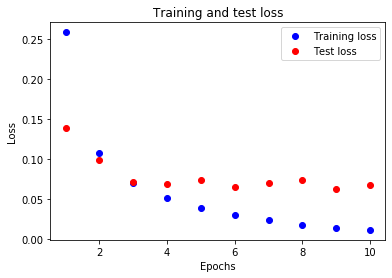

In [197]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

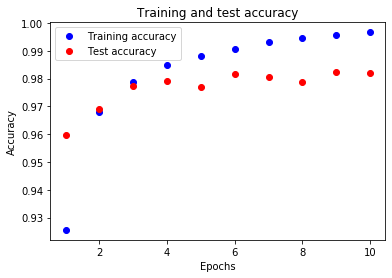

In [199]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()